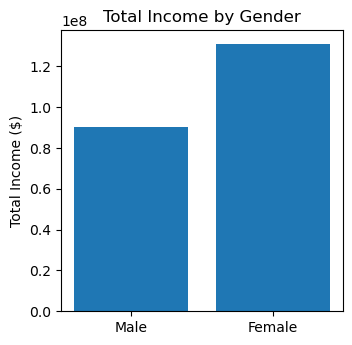

In [4]:
import pandas as pd
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

#please note all codes are written based on the GUI and no error occurs
# kindly the change the data file path to your corresponding directory on your system


# Load the data from a CSV file
data = pd.read_csv('C:/Users/user/Desktop/aji/Uk work/Customers.csv')

# Create a new window
window = tk.Tk()

# Set the window title
window.title("Customers Data")

# Create a table to display the data
table = ttk.Treeview(window)

# Define the columns
table["columns"] = ["CustomerID", 'Gender', 'Age', 'Income($)', 'Score (1-100)', 'Profession','Work Experience', 'Family Size']

# Set the column headings
for column in table["columns"]:
    table.heading(column, text=column)

# Add the data to the table
for i, row in data.iterrows():
    table.insert("", "end", text=i, values=tuple(row))

#Adding Search     
search_label = tk.Label(window, text="Search by Customer ID:")
search_label.pack()
search_entry = tk.Entry(window)
search_entry.pack()

def search_customer():
    # Retrieve the text entered in the search bar
    customer_id = search_entry.get()
    
    # Filter the data in the table to show only rows with the matching customer ID
    matched_rows = data.loc[data['CustomerID'] == customer_id]
    
    # Create a new window to display the search results
    results_window = tk.Toplevel(window)
    results_window.title("Search Results")
    
    # Create a table to display the search results
    results_table = ttk.Treeview(results_window)
    results_table["columns"] = ["CustomerID", 'Gender', 'Age', 'Income($)', 'Score (1-100)', 'Profession','Work Experience', 'Family Size']
    
    # Set the column headings
    for column in results_table["columns"]:
        results_table.heading(column, text=column)
    
    # Add the matched rows to the results table
    for i, row in matched_rows.iterrows():
        results_table.insert("", "end", text=i, values=tuple(row))
    
    # Add a scrollbar to the results table
    results_scrollbar = ttk.Scrollbar(results_window, orient="vertical", command=results_table.yview)
    results_scrollbar.pack(side="right", fill="y")
    results_table.configure(yscrollcommand=results_scrollbar.set)
    
    # Pack the results table to display it
    results_table.pack(fill="both", expand=True)

window.bind("<Return>", lambda event=None: search_button.invoke())

search_button = tk.Button(window, text="Search", command=search_customer)
search_button.pack()

    
# Add a scrollbar
scrollbar = ttk.Scrollbar(window, orient="vertical", command=table.yview)
scrollbar.pack(side="right", fill="y")
table.configure(yscrollcommand=scrollbar.set)

# Pack the table to display it
table.pack(fill="both", expand=True)

# Create age groups
data['Age'] = pd.cut(data['Age'], bins=[0, 30, 120], labels=['18-30', '30+'])

# Calculate the percentage of time spent shopping by age group
age_shopping_time = data.groupby('Age')['Spending Score (1-100)'].sum() / data['Spending Score (1-100)'].sum() * 100

# Create a frame for the shopping chart
shopping_frame = ttk.Frame(window)
shopping_frame.pack(side=tk.LEFT)

# Create a figure for the shopping chart
shopping_fig = plt.Figure(figsize=(5, 4), dpi=100)
shopping_plot = shopping_fig.add_subplot(111)
shopping_plot.pie(age_shopping_time, labels=age_shopping_time.index, autopct='%1.1f%%')
shopping_plot.set_title('Percentage of Time Spent Shopping by Age Group')

# Create a canvas for the shopping chart
shopping_canvas = FigureCanvasTkAgg(shopping_fig, master=shopping_frame)
shopping_canvas.draw()
shopping_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Create a frame for the spending by profession category pie chart
profession_spending_frame = tk.Frame(window)
profession_spending_frame.pack(side=tk.LEFT)

# Group data by profession category and calculate total spending
spending_by_profession = data.groupby('Profession')['Spending Score (1-100)'].sum()

# Create pie chart
fig3 = Figure(figsize=(4, 4), dpi=100)
ax3 = fig3.add_subplot(111)
ax3.pie(spending_by_profession.values, labels=spending_by_profession.index,
        autopct='%1.1f%%', startangle=90)
ax3.set_title('Spending by Profession Category')
canvas3 = FigureCanvasTkAgg(fig3, master=profession_spending_frame)
canvas3.draw()
canvas3.get_tk_widget().pack()

# Create a frame to hold the bar chart
chart_frame = tk.Frame(window)
chart_frame.pack(side=tk.LEFT)

# Create subsets of the data for gender groups
male_data = data.loc[data["Gender"] == "Male"]
female_data = data.loc[data["Gender"] == "Female"]

# Calculate total income for each gender group
male_income = male_data["Annual Income ($)"].sum()
female_income = female_data["Annual Income ($)"].sum()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(["Male", "Female"], [male_income, female_income])
ax.set_ylabel("Total Income ($)")
ax.set_title("Total Income by Gender")

# Add the bar chart to the chart frame
canvas1 = FigureCanvasTkAgg(fig, master=chart_frame)
canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Start the event loop
window.mainloop()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   int64   
 1   Gender                  2000 non-null   object  
 2   Age                     1976 non-null   category
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              1965 non-null   object  
 6   Work Experience         2000 non-null   int64   
 7   Family Size             2000 non-null   int64   
dtypes: category(1), int64(5), object(2)
memory usage: 111.6+ KB
